In [58]:
import csv
import re
from operator import itemgetter

with open('D:/BI_Developer_HW/BI_Developer_HW/NEISS2014.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)
    header = data[0]
    new_data = data[1:len(data)]
    
    age = [int(row[5]) for row in new_data]
    sex = [row[6] for row in new_data]
    race = [row[7] for row in new_data]
    diag = [row[9] for row in new_data]
    body_part = [row[11] for row in new_data]
    disposition = [row[12] for row in new_data]
    location = [row[13] for row in new_data]
    narrative = [row[17] for row in new_data]
    
    body_part_count = {}
    for part in body_part:
        if part in body_part_count:
            body_part_count[part] += 1
        else:
            body_part_count[part] = 1
    
    # print(body_part_count)
    # print(sorted(body_part_count, key = body_part_count.get, reverse = False))
    a = sorted(body_part_count.items(), key = itemgetter(1), reverse = True)
    print(a)
    
    total_age_skateboard_injuries = 0
    skateboard_count = 0
    male_count = 0
    female_count = 0
    for i, sent in enumerate(narrative):
        if re.search('SKATEBOARD', sent) is not None:
            if sex[i] == 'Male' is not None:
                male_count += 1
            else:
                female_count += 1
            skateboard_count += 1
        else:
            pass
        
    print(skateboard_count) # Number of injuries involving a skateboard
    print(male_count) # Number of male injuries involving a skateboard
    print(female_count) # Number of female injuries involving a skateboard
    
    print((male_count * 100) / skateboard_count) # Percentage of male injuries involving a skateboard
    print((female_count * 100) / skateboard_count) # Percentage of female injuries involving a skateboard
    
    for i, sent in enumerate(narrative):
        if re.search('SKATEBOARD', sent) is not None:
            total_age_skateboard_injuries += age[i]
        else:
            pass
    average_age = total_age_skateboard_injuries / skateboard_count
    
    print(total_age_skateboard_injuries)
    print(average_age)
    
hospitalization_count = {}
not_seen_count = {}
for i, no in enumerate(disposition):
    if no == '4' is not None:
        if diag[i] in hospitalization_count:
            hospitalization_count[diag[i]] += 1
        else:
            hospitalization_count[diag[i]] = 1
    elif no == '6' is not None:
        if diag[i] in not_seen_count:
            not_seen_count[diag[i]] += 1
        else:
            not_seen_count[diag[i]] = 1
    else:
        pass

sorted_hospitalization_count = sorted(hospitalization_count.items(), key = itemgetter(1), reverse = True)
sorted_not_seen_count = sorted(not_seen_count.items(), key = itemgetter(1), reverse = True)

print(sorted_hospitalization_count) 
print(sorted_not_seen_count)

[('75', 9891), ('76', 5786), ('92', 5783), ('79', 5717), ('31', 3868), ('37', 3781), ('35', 3616), ('82', 3369), ('83', 3090), ('30', 2675), ('33', 2561), ('36', 2239), ('34', 2116), ('32', 1612), ('85', 1422), ('93', 1280), ('88', 1254), ('89', 1080), ('77', 847), ('94', 782), ('81', 756), ('80', 745), ('0', 549), ('87', 390), ('38', 286), ('84', 4)]
466
384
82
82.40343347639485
17.59656652360515
8384
17.991416309012877
[('57', 1811), ('62', 630), ('71', 613), ('53', 217), ('59', 185), ('68', 88), ('52', 70), ('41', 56), ('55', 43), ('64', 43), ('58', 42), ('48', 29), ('51', 27), ('69', 23), ('50', 20), ('61', 17), ('63', 15), ('65', 13), ('72', 12), ('56', 10), ('42', 5), ('67', 3), ('47', 2), ('60', 2), ('74', 2), ('66', 1)]
[('71', 257), ('59', 123), ('62', 63), ('53', 52), ('68', 24), ('64', 21), ('58', 12), ('56', 10), ('51', 10), ('52', 7), ('63', 7), ('57', 6), ('48', 5), ('60', 4), ('55', 3), ('65', 3), ('42', 2), ('74', 2), ('72', 2), ('49', 2), ('50', 2), ('41', 1), ('73', 1

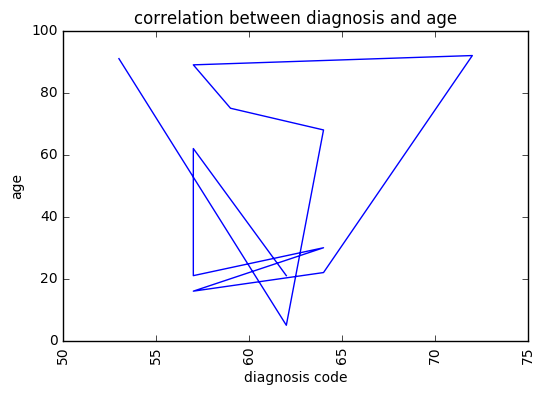

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

NEISS_2014 = pd.read_csv('D:/BI_Developer_HW/BI_Developer_HW/NEISS2014.csv')
first_twelve = NEISS_2014[:12]
plt.plot(first_twelve['diag'], first_twelve['age'])
plt.xticks(rotation = 90)
plt.xlabel('diagnosis code')
plt.ylabel('age')
plt.title('correlation between diagnosis and age')
plt.show()